In [1]:
# #Installation of pyod library
# pip install pyod 

In [1]:
#Import modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
train=pd.read_csv('train_data1.csv')
test=pd.read_csv('test_data1.csv')


In [3]:
train.shape

(125973, 42)

In [4]:
test.shape

(10000, 43)

In [5]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [6]:
test.columns

Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [7]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,icmp,50,4,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos
125969,8,udp,50,2,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,icmp,55,2,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,icmp,31,4,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [8]:
#Dropping the unwanted/unnecessary "Unnamed" column and combining train and test into one dataframe "new"
test = test.drop('Unnamed: 0',axis=1)
test


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,icmp,25,2,315,2537,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
9996,0,icmp,25,2,238,6882,0,0,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
9997,0,udp,50,2,54,55,0,0,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
9998,0,icmp,25,2,228,5210,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [9]:
#Combining train and test files into one dataframe (new)
new=pd.concat([train,test],ignore_index=True)

In [10]:
new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
# new1 = new.loc[:, (new==0).mean() < .8]
# new1

In [12]:
# po.hist(figsize=(20,20))
# plt.show()

In [13]:
new.shape

(135973, 42)

In [14]:

new.xAttack.value_counts()

normal    71672
dos       49259
probe     12709
r2l        2194
u2r         139
Name: xAttack, dtype: int64

In [15]:
#Re-structuring the df by deleting dos, probe and r2l data, to keep only one class of attack in the xAttack column (target feature)
todrop=['dos','probe','u2r']
data=new[~new['xAttack'].isin(todrop)]
data.reset_index(drop=True, inplace=True)
data.xAttack.value_counts()


normal    71672
r2l        2194
Name: xAttack, dtype: int64

In [16]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,25,2,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal


In [17]:
data.isnull().values.any()

False

In [18]:
data['protocol_type'].value_counts()

icmp    59055
udp     13454
tcp      1357
Name: protocol_type, dtype: int64

In [19]:
data.isnull().values.any()

False

In [20]:
# #To see columns that have more than 80% zero values
# po = data.loc[:, (data==0).mean() > .8]
# po.shape

In [21]:
# po.hist(figsize=(20,20))
# plt.show()

In [22]:
# enconding categorical feature
from sklearn.preprocessing import LabelEncoder
cat_features = ['protocol_type']
encoder = LabelEncoder()
# Apply the label encoder to each column
#LEX = data[cat_features].apply(encoder.fit_transform)
LEX=pd.DataFrame(encoder.fit_transform(data[cat_features]))
# encoded.protocol_type.value_counts()
LEX

,0
0,0
1,2
2,0
3,0
4,0
...,...
73861,0
73862,0
73863,2
73864,0


In [23]:
#Applying OneHotEncoder 
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoder to each column with categorical data
enc = OneHotEncoder(handle_unknown='ignore')
#one_hot_encoded_frame =  pd.DataFrame(train_X_encoded, columns= column_name)
OH=enc.fit_transform(LEX)
column_name = enc.get_feature_names(['protocol_type'])
OHX = pd.DataFrame(OH.toarray(),columns=column_name)
OHX.head()

,protocol_type_0,protocol_type_1,protocol_type_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [24]:
# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop('protocol_type', axis=1)
num_data.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,20,2,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,45,2,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,25,2,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,25,2,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,25,2,287,2251,0,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal


In [25]:
# Add one-hot encoded columns to numerical features
data = OHX.join(num_data)
data

,protocol_type_0,protocol_type_1,protocol_type_2,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,1.0,0.0,0.0,0,20,2,491,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,0.0,1.0,0,45,2,146,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,1.0,0.0,0.0,0,25,2,232,8153,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,1.0,0.0,0.0,0,25,2,199,420,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,1.0,0.0,0.0,0,25,2,287,2251,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,1.0,0.0,0.0,0,25,2,315,2537,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
73862,1.0,0.0,0.0,0,25,2,238,6882,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
73863,0.0,0.0,1.0,0,50,2,54,55,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
73864,1.0,0.0,0.0,0,25,2,228,5210,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [26]:
#Replacing values on the target column
data.xAttack.replace(['normal', 'r2l'], [0, 1], inplace=True)
data.head()

,protocol_type_0,protocol_type_1,protocol_type_2,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,1.0,0.0,0.0,0,20,2,491,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,0.0,1.0,0,45,2,146,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,1.0,0.0,0.0,0,25,2,232,8153,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,1.0,0.0,0.0,0,25,2,199,420,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,1.0,0.0,0.0,0,25,2,287,2251,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0


In [27]:
data.describe()

,protocol_type_0,protocol_type_1,protocol_type_2,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
count,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,7.386600e+04,7.386600e+04,73866.000000,73866.000000,...,73866.000000,73866.000000,73866.000000,73866.00000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000
mean,0.799488,0.018371,0.182141,166.973195,27.939566,2.033385,1.675130e+04,5.301268e+03,0.000095,0.000866,...,188.724366,0.813836,0.039556,0.12876,0.026354,0.013461,0.005954,0.045079,0.042178,0.029702
std,0.400386,0.134290,0.385963,1318.540558,13.345938,0.641886,4.259157e+05,9.685039e+04,0.009734,0.048248,...,93.514485,0.322668,0.128103,0.26661,0.068895,0.089739,0.055821,0.190986,0.186849,0.169766
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,1.210000e+02,9.300000e+01,0.000000,0.000000,...,114.000000,0.760000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,25.000000,2.000000,2.330000e+02,3.740000e+02,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,25.000000,2.000000,3.240000e+02,2.062750e+03,0.000000,0.000000,...,255.000000,1.000000,0.020000,0.08000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,57715.000000,66.000000,11.000000,8.958152e+07,7.028652e+06,1.000000,3.000000,...,255.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


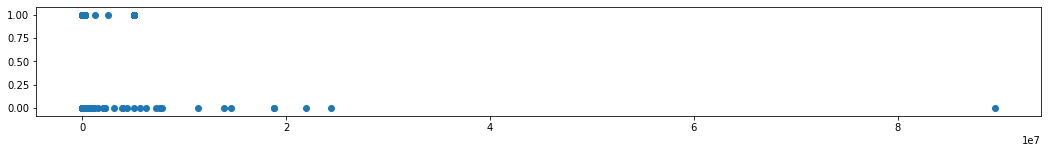

In [42]:
x=data.src_bytes
y=data.xAttack
fig, ax = plt.subplots(figsize=(18,2))
ax.scatter(x,y)

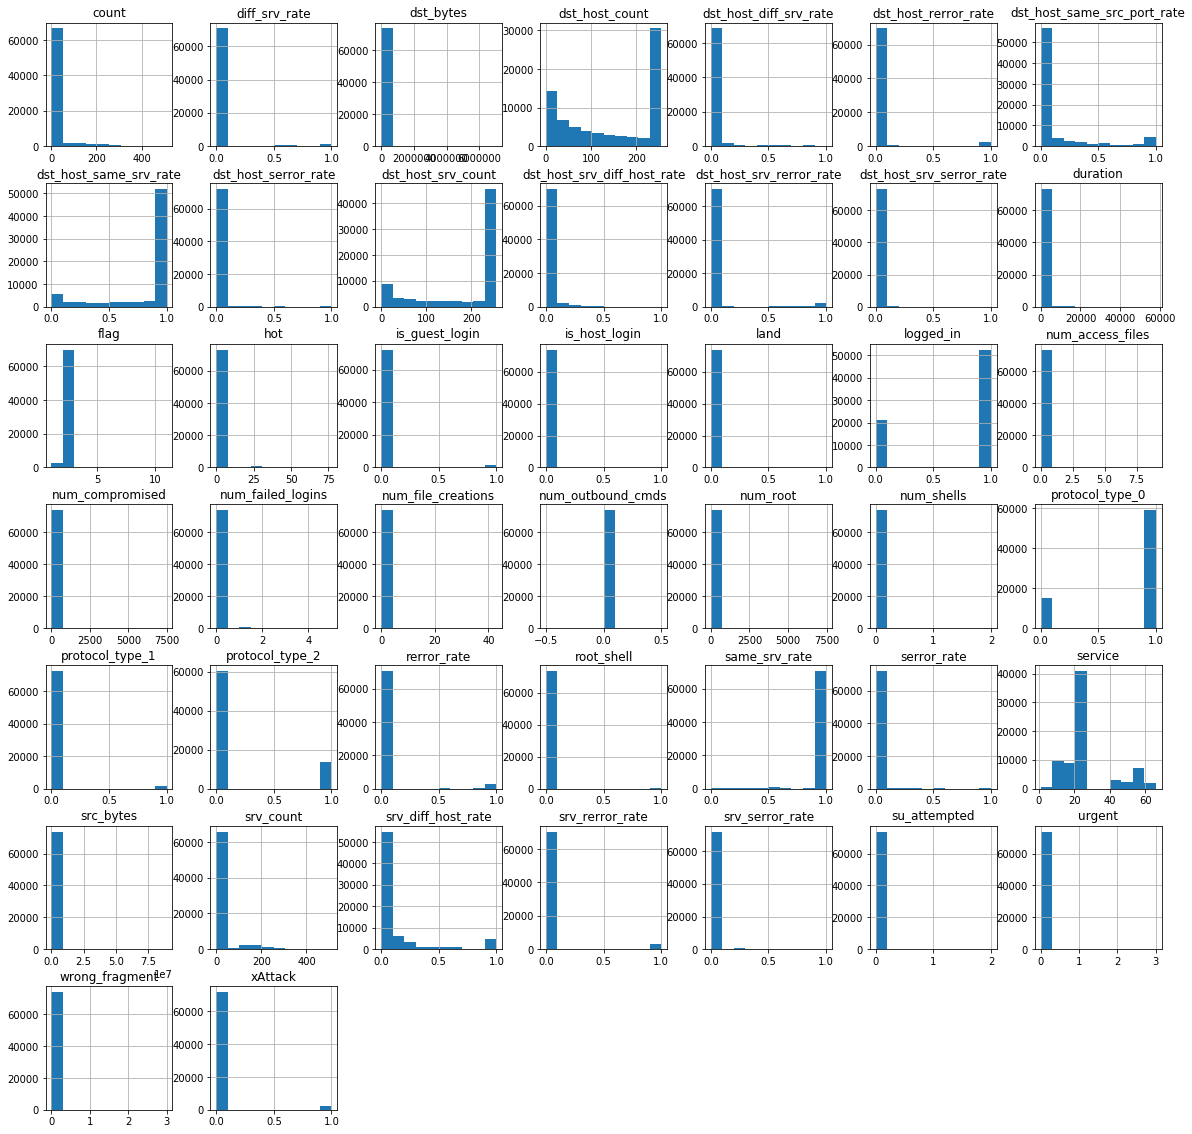

In [28]:
data.hist(figsize=(20,20))
plt.show()

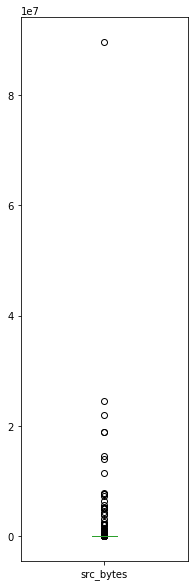

In [43]:
data['src_bytes'].plot(kind='box', figsize=(3,10))
#plt.title()
#plt.ylabel('')
plt.show()

In [30]:
data.isnull().values.any()


False

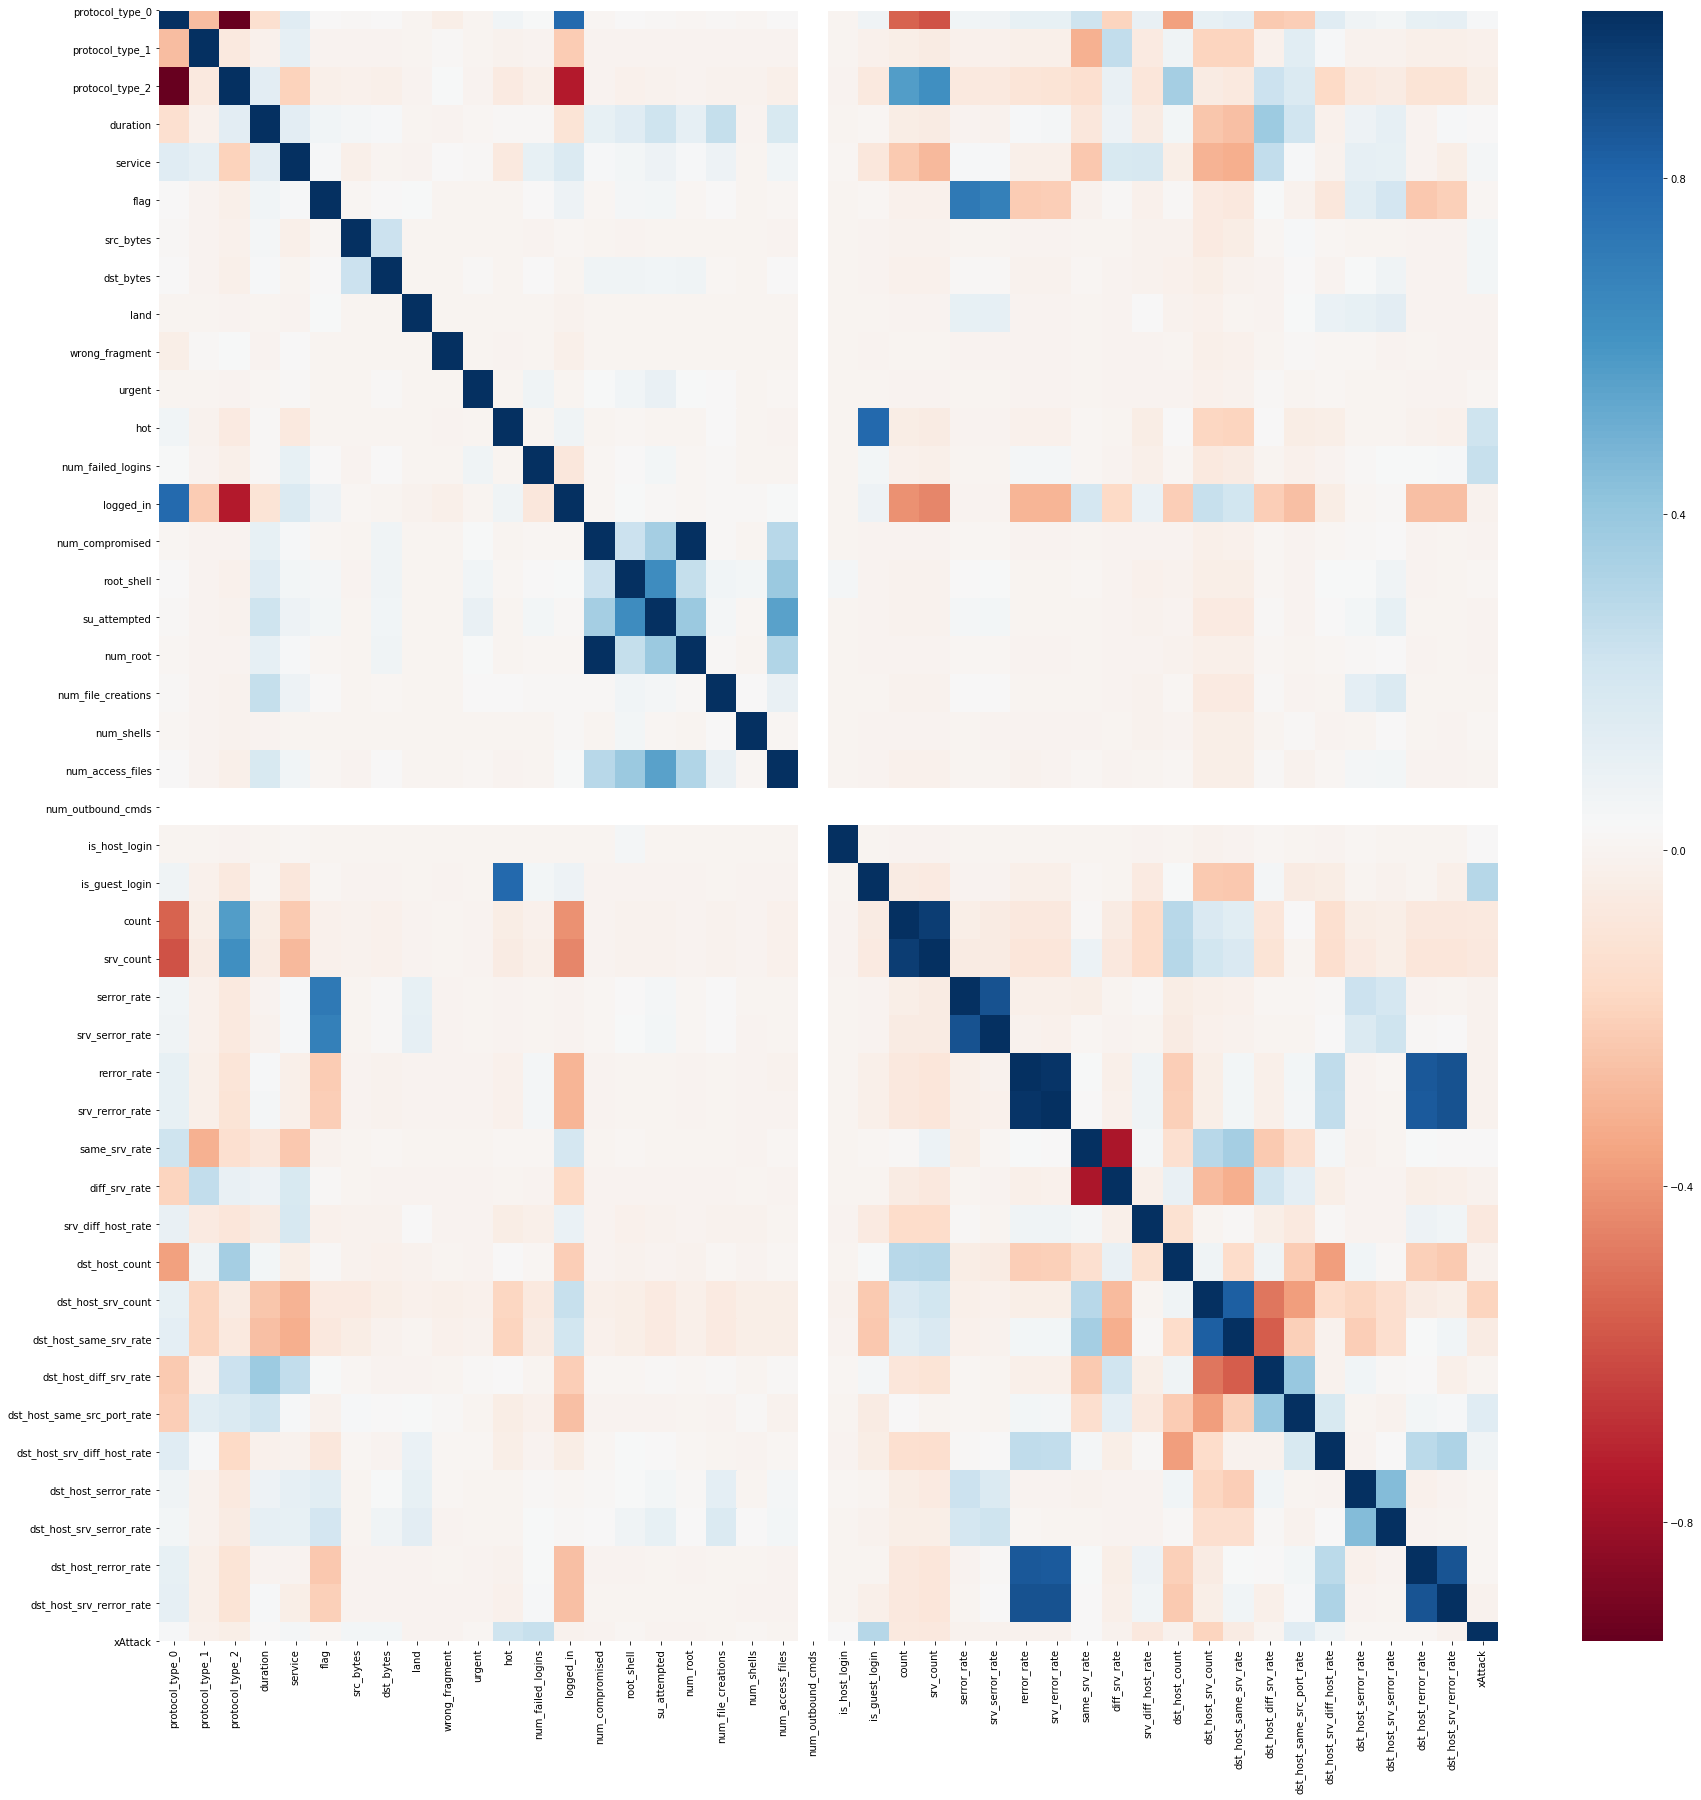

In [31]:
corr=data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap=plt.cm.RdBu)
plt.show()

In [32]:
#Separating data features from label feature
X = data.drop(['xAttack'], axis=1)
y=data['xAttack']
X

,protocol_type_0,protocol_type_1,protocol_type_2,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1.0,0.0,0.0,0,20,2,491,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.0,1.0,0,45,2,146,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,1.0,0.0,0.0,0,25,2,232,8153,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,1.0,0.0,0.0,0,25,2,199,420,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.0,0.0,0.0,0,25,2,287,2251,0,0,...,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,1.0,0.0,0.0,0,25,2,315,2537,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
73862,1.0,0.0,0.0,0,25,2,238,6882,0,0,...,7,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00
73863,0.0,0.0,1.0,0,50,2,54,55,0,0,...,255,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00
73864,1.0,0.0,0.0,0,25,2,228,5210,0,0,...,129,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00


0    71672
1     2194
Name: xAttack, dtype: int64


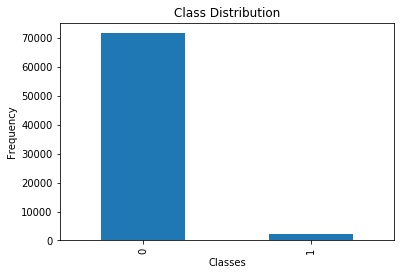

In [33]:
#Class distribution of the target column
count_classes = y.value_counts()
count_classes.plot(kind = 'bar')
plt.title("Class Distribution")
plt.xticks
plt.xlabel("Classes")
plt.ylabel("Frequency")
print(count_classes)

In [34]:
# sklearn train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=0)

In [35]:
#FEATURE NORMALIZATION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)
X=pd.concat([X_train,X_test],ignore_index=True)

In [36]:
X.describe()

,protocol_type_0,protocol_type_1,protocol_type_2,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,...,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000
mean,1.997719,0.137297,0.472026,0.129365,2.093503,3.152888,0.036665,0.059651,0.011873,0.017555,...,1.444605,2.017679,2.521583,0.307785,0.482470,0.385217,0.151216,0.108368,0.234864,0.225366
std,1.000463,1.003620,1.000241,1.021557,1.000007,0.995283,0.932235,1.089776,1.219619,0.977539,...,0.999836,0.999777,0.999752,0.996770,0.999000,1.007055,1.008127,1.015955,0.995047,0.998381
min,0.000000,0.000000,0.000000,0.000000,0.074930,1.550561,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.498747,0.000000,0.000000,0.000000,1.498594,3.101123,0.000265,0.001046,0.000000,0.000000,...,0.381134,1.218790,2.354778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.498747,0.000000,0.000000,0.000000,1.873242,3.101123,0.000510,0.004208,0.000000,0.000000,...,1.544080,2.726241,3.098392,0.000000,0.037470,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.498747,0.000000,0.000000,0.000000,1.873242,3.101123,0.000709,0.023210,0.000000,0.000000,...,2.492028,2.726241,3.098392,0.155621,0.299763,0.438517,0.000000,0.000000,0.000000,0.000000
max,2.498747,7.473521,2.591546,44.715487,4.945359,17.056174,196.074028,79.087497,125.289665,60.782758,...,2.492028,2.726241,3.098392,7.781030,3.747042,14.617221,11.233966,18.200321,5.210064,5.343251


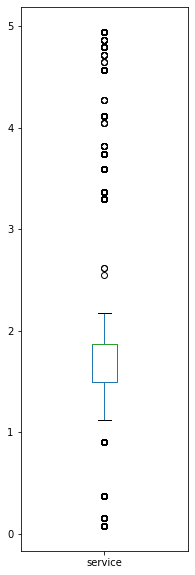

In [37]:
X['service'].plot(kind='box', figsize=(3,10))

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=1)

In [38]:
#FEATURE SELECTION WITH SELECT FROM MODEL
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel
# logistic = LogisticRegression(C=1, penalty="l1", random_state=8).fit(X_train, y_train)
# model = SelectFromModel(logistic, prefit=True)
# L = model.transform(X_train)
# Sfeatures = pd.DataFrame(model.inverse_transform(L), 
#                                  index=X_train.index, 
#                                  columns=X_train.columns)
# s_columns = Sfeatures.columns[Sfeatures.var() != 0]
# X=X[s_columns]
# X

In [39]:
# #Feature importance
# from sklearn.ensemble import ExtraTreesClassifier
# # fit an Extra Trees model to the data
# ET = ExtraTreesClassifier()
# ET.fit(X,y)
# # display the relative importance of each attribute
# print(ET.feature_importances_)
# feat_importances = pd.Series(ET.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

In [40]:
#Feature Selection WITH RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# create the RFE model and select 20 attributes
rfe = RFE(LR, 20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features
X=X[selected_features]
# #sklearn train_test split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=4)


[False  True False False False False False False False False  True False
  True False False  True  True False False  True False False  True  True
 False False  True  True  True  True False False  True False False  True
  True  True  True  True False  True  True]
[19  1  5 21 12  6 23 22  7 10  1 18  1  2  8  1  1 14 11  1  4 24  1  1
  3 20  1  1  1  1 16  9  1 15 17  1  1  1  1  1 13  1  1]


In [41]:
# #FEATURE SELECTION WITH SELECT K BEST
# from sklearn.feature_selection import SelectKBest, f_classif
# selector = SelectKBest(f_classif, k=20)
# X_new = selector.fit_transform(X_train, y_train)
# X_new
# selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
#                                  index=X_train.index, 
#                                  columns=X_train.columns)
#  #selected_features.head()
# selected_columns = selected_features.columns[selected_features.var() != 0]
# X=X[selected_columns]
# X

In [42]:
# sklearn train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=2)

In [43]:
X_train

,protocol_type_1,urgent,num_failed_logins,root_shell,su_attempted,num_shells,is_host_login,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
49064,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,1.00,0.70,0.04,0.01,0.00,0.00,0.00,0.00
72713,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.09,1.00,0.00,0.00,0.01,0.00,0.00,0.00
68999,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.00,0.82,0.06,0.82,0.02,0.00,0.00,0.00
26815,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.29,1.00,0.00,0.00,0.00,0.00,0.00,0.00
44740,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44295,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.33,1.00,0.00,0.01,0.02,0.00,0.00,0.00
33867,0.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.00,1.00,0.00,0.06,0.04,0.00,0.00,0.00
31019,0.0,0,0,0,0,0,0,0,0.99,0.0,0.0,0.0,1.00,0.22,0.06,0.00,0.00,0.58,0.04,0.04
44566,1.0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [44]:
# #sklearn train_test split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=0)

# #Feature Selection SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel
# logistic = LogisticRegression(C=1, penalty="l1", random_state=8).fit(X_train, y_train)
# model = SelectFromModel(logistic, prefit=True)
# L = model.transform(X_train)
# Sfeatures = pd.DataFrame(model.inverse_transform(L), 
#                                  index=X_train.index, 
#                                  columns=X_train.columns)
# Sfeatures
# s_columns = Sfeatures.columns[Sfeatures.var() != 0]
# X=X[s_columns]
# X

In [45]:
# #sklearn train_test split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=0)

In [46]:
y.value_counts()

0    71672
1     2194
Name: xAttack, dtype: int64

#### Import and Train Models

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
Gnb = GaussianNB().fit(X_train, y_train)
#yhat = Gnb.predict(X_test)

In [49]:
lr=LogisticRegression().fit(X_train, y_train)
#yhat = lr.predict(X_test)

In [50]:
knn = KNeighborsClassifier().fit(X_train,y_train)
#yhat = knn.predict(X_test)

In [51]:
#svc = SVC(kernel='linear').fit(X_train, y_train) 

In [52]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,y_train)
#yhat = dtc.predict(X_test)

In [53]:
rfc = RandomForestClassifier().fit(X_train, y_train)
#yhat = rfc.predict(X_test)

In [54]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
#yhat = gbc.predict(X_test)

#### Model Evaluation

In [55]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
model = []
model.append(('GaussianNB', Gnb))
model.append(('LogisticRegres', lr))
model.append(('KNN', knn))
#model.append(('SVC', svc))
model.append(('DecisionTreeClassif',dtc))
model.append(('RandomForestClassif',rfc))
model.append(('GradientBoostClassif',gbc))

for a, b in model:
    cv_recall = cross_val_score(b, X, y, cv=6,scoring = 'recall')
    cv_precis = cross_val_score(b, X, y, cv=6,scoring = 'precision')
    accuracy_train = metrics.accuracy_score(y_train, b.predict(X_train))
    accuracy_test = metrics.accuracy_score(y_test, b.predict(X_test))
    confusion_matrix_train = metrics.confusion_matrix(y_train, b.predict(X_train))
    confusion_matrix_test = metrics.confusion_matrix(y_test, b.predict(X_test))
    classification_train = metrics.classification_report(y_train, b.predict(X_train))
    classification_test = metrics.classification_report(y_test, b.predict(X_test))
    print('************{} Model Evaluation************** '.format(a))
    print('Cross-validation scores (6-fold,recall):', cv_recall)
    print()
    print ("Cross Validation Mean Score(recall):" "\n", cv_recall.mean())
    print()
    print('Cross-validation scores (6-fold,precision):', cv_precis)
    print()
    print ("Cross Validation Mean Score(precision):" "\n", cv_precis.mean())
    print()
    print ("Model Accuracy_train:" "\n", accuracy_train)
    print()
    print ("Model Accuracy_test:" "\n", accuracy_test)
    print()
    print("Confusion matrix_train:" "\n", confusion_matrix_train)
    print()
    print("Confusion matrix_test:" "\n", confusion_matrix_test)
    print()
    print("Classification report(trainset):" "\n", classification_train) 
    print()
    print("Classification report(testset):" "\n", classification_test) 
    print()

************GaussianNB Model Evaluation************** 
Cross-validation scores (6-fold,recall): [0.39344262 0.96174863 0.46721311 0.34699454 0.35068493 0.41917808]

Cross Validation Mean Score(recall):
 0.4898769868004092

Cross-validation scores (6-fold,precision): [0.31304348 0.04181516 0.40235294 0.3557423  0.32241814 0.45      ]

Cross Validation Mean Score(precision):
 0.314228668395172

Model Accuracy_train:
 0.9627305450259612

Model Accuracy_test:
 0.9653429602888086

Confusion matrix_train:
 [[59634  1248]
 [ 1092   812]]

Confusion matrix_test:
 [[10571   219]
 [  165   125]]

Classification report(trainset):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     60882
           1       0.39      0.43      0.41      1904

    accuracy                           0.96     62786
   macro avg       0.69      0.70      0.70     62786
weighted avg       0.96      0.96      0.96     62786


Classification report(testset):
            

#### Hyperparameters tuning with GridSearch

In [56]:
#GRIDSEARCH FOR LOGISTIC REGRESSION MODEL
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

hparams = {'penalty': ['l1', 'l2'],'C':[0.01,0.1,1,10,100]}
# default metric to optimize over grid parameters: accuracy
grid_lr = GridSearchCV(lr, param_grid = hparams,scoring = 'f1')
grid_lr.fit(X_train, y_train)

print('Grid best parameter (max. f1): ', grid_lr.best_params_)
print('Grid best score (f1): ', grid_lr.best_score_)
best_est=grid_lr.best_estimator_
print (best_est)
prediction=grid_lr.predict(X_test)

#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))

Grid best parameter (max. f1):  {'C': 10, 'penalty': 'l1'}
Grid best score (f1):  0.19666766139389447
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Metrix:
 [[10767    23]
 [  261    29]]
Accuracy:
 0.9743682310469314
Recall:
 0.1
Precision:
 0.1
F1:
 0.16959064327485382


In [57]:
#GRIDSEARCH FOR KNN MODEL
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

hparams = {'n_neighbors': list(range(1,15))}
# default metric to optimize over grid parameters: accuracy
grid_knn = GridSearchCV(knn, param_grid = hparams,scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_knn.best_params_)
print('Grid best score (auc): ', grid_knn.best_score_)
best_est=grid_knn.best_estimator_
print (best_est)
prediction=grid_knn.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))

Grid best parameter (max. auc):  {'n_neighbors': 13}
Grid best score (auc):  0.9498996334637871
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
Confusion Metrix:
 [[10762    28]
 [   92   198]]
Accuracy:
 0.9891696750902527
Recall:
 0.6827586206896552
Precision:
 0.6827586206896552
F1:
 0.7674418604651163


In [58]:
#GRID SEARCH FOR SVC MODEL
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

hparams = {'C':[0.001,0.01,0.1,1,10,100]}
# default metric to optimize over grid parameters: accuracy
grid_svc = GridSearchCV(svc, param_grid = hparams,scoring = 'roc_auc')
grid_svc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_svc.best_params_)
print('Grid best score (auc): ', grid_svc.best_score_)
best_est=grid_svc.best_estimator_
print (best_est)
prediction=grid_svc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))

NameError: name 'svc' is not defined

In [ ]:
#GRID SEARCH FOR DECISION TREE CLASSIFIER MODEL
hparams = {'max_depth': list(range(1,15))}
# default metric to optimize over grid parameters: accuracy
grid_dtc = GridSearchCV(dtc, param_grid = hparams,scoring = 'roc_auc')
grid_dtc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_dtc.best_params_)
print('Grid best score (auc): ', grid_dtc.best_score_)
best_est=grid_dtc.best_estimator_
print (best_est)
prediction=grid_dtc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))

In [ ]:
#GRID SEARCH FOR RANDOM FOREST CLASSIFIER MODEL
hparams = {'max_depth': None,'max_features':list(range(4,10)),'n_estimators':list(range(8,20)),n_jobs:-1}
# default metric to optimize over grid parameters: accuracy
grid_rfc = GridSearchCV(rfc, param_grid = hparams,scoring = 'roc_auc')
grid_rfc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_rfc.best_params_)
print('Grid best score (auc): ', grid_rfc.best_score_)
best_est=grid_rfc.best_estimator_
print (best_est)
prediction=grid_rfc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))

In [ ]:
#GRID SEARCH FOR GRADIENT BOOST CLASSIFIER MODEL
hparams = {'max_depth': list(range(2,10)),'learning_rate':[0.1,0.5,1],'n_estimators': list(range(4,20))}
# default metric to optimize over grid parameters: accuracy
grid_gbc = GridSearchCV(gbc, param_grid = hparams,scoring = 'roc_auc')
grid_gbc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_gbc.best_params_)
print('Grid best score (auc): ', grid_gbc.best_score_)
best_est=grid_gbc.best_estimator_
print (best_est)
prediction=grid_gbc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(prediction,y_test))
print("F1:\n",metrics.f1_score(prediction,y_test))